#### Predicting Salary of Adults with ML

#### Problem
+ Prediction task is to determine whether a person makes over 50K a year.
+ Source:https://archive.ics.uci.edu/ml/machine-learning-databases/adult/




In [1]:
## Load EDA
import pandas as pd
import numpy as np

In [2]:

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

### Attributes
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]

In [4]:
# Load Dataset
df = pd.read_csv("adult.data",names=column_names)

In [5]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country   class  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [7]:
df.shape

(32561, 15)

In [8]:
# Data Types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

#### Need to Convert To Numerical Values/Cat

In [9]:
# Find All Columns That Are Objects
df.dtypes[df.dtypes == 'object']

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
class             object
dtype: object

In [10]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [11]:
# d = {ni: indi for indi, ni in enumerate(set(names))}
d = {v: k for k, v in enumerate(set(df['workclass'].unique()))}

In [12]:
d

{' Local-gov': 0,
 ' Without-pay': 1,
 ' Never-worked': 2,
 ' Self-emp-inc': 3,
 ' State-gov': 4,
 ' Private': 5,
 ' ?': 6,
 ' Self-emp-not-inc': 7,
 ' Federal-gov': 8}

In [13]:
# Function to Assign Numbers to Unique Values
def generate_dict(data):
    my_dict = {v: k for k, v in enumerate(set(data))}
    return my_dict

In [14]:
generate_dict(df['education'].unique())

{' 1st-4th': 0,
 ' Assoc-voc': 1,
 ' Prof-school': 2,
 ' 5th-6th': 3,
 ' Masters': 4,
 ' 10th': 5,
 ' Assoc-acdm': 6,
 ' 12th': 7,
 ' 7th-8th': 8,
 ' HS-grad': 9,
 ' 9th': 10,
 ' Some-college': 11,
 ' Doctorate': 12,
 ' 11th': 13,
 ' Preschool': 14,
 ' Bachelors': 15}

In [15]:
obj_list = ["workclass","education","marital-status ","occupation","relationship","race ","sex ","native-country","class"]
obj_names = ["d_workclass","d_education","d_marital-status ","d_occupation","d_relationship","d_race ","d_sex ","d_native-country","d_class"]
for i,j in zip(obj_names,obj_list):
    print('{} = generate_dict(df["{}"].unique())'.format(i,j))
    
    

d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital-status  = generate_dict(df["marital-status "].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race  = generate_dict(df["race "].unique())
d_sex  = generate_dict(df["sex "].unique())
d_native-country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())


In [16]:
d_workclass = generate_dict(df["workclass"].unique())
d_education = generate_dict(df["education"].unique())
d_marital_status  = generate_dict(df["marital-status"].unique())
d_occupation = generate_dict(df["occupation"].unique())
d_relationship = generate_dict(df["relationship"].unique())
d_race  = generate_dict(df["race"].unique())
d_sex  = generate_dict(df["sex"].unique())
d_native_country = generate_dict(df["native-country"].unique())
d_class = generate_dict(df["class"].unique())

In [17]:
d_workclass

{' Local-gov': 0,
 ' Without-pay': 1,
 ' Never-worked': 2,
 ' Self-emp-inc': 3,
 ' State-gov': 4,
 ' Private': 5,
 ' ?': 6,
 ' Self-emp-not-inc': 7,
 ' Federal-gov': 8}

# Mapping the Dataset
+ Method 1 using map
+ Method 2 using get_dummies

In [18]:
df2 = df

In [19]:
df2.head(10)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital-gain  capital-loss  hours-per-week  native-country   class  
0     Male          2174             0              40   United-States   <=50K  
1     Male             0             0              13   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3     Male             0             0              40   United-States   <=50K  
4   Female             0             0              40            Cuba   <=50K  
5   Female             0             0              40   United-States   <=50K  
6   Female             0             0              16         Jamaica   <=50K  
7     Male             0             0              45   United-States    >50K  
8   Female         14084             0              50   United-States    >50K  
9     Male          5178             0              40   United-States    >50K

In [20]:
df2["workclass"] = df2["workclass"].map(d_workclass)
df2["education"] = df2["education"].map(d_education)
df2["marital-status"] = df2["marital-status"].map(d_marital_status)
df2["occupation"] = df2["occupation"].map(d_occupation)
df2["relationship"] = df2["relationship"].map(d_relationship)
df2["race"] = df2["race"].map(d_race)
df2["sex"] = df2["sex"].map(d_sex)
df2["native-country"] = df2["native-country"].map(d_native_country)
df2["class"] = df2["class"].map(d_class)

In [21]:
df2.head(10)

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          4   77516         15             13               3   
1   50          7   83311         15             13               1   
2   38          5  215646          9              9               4   
3   53          5  234721         13              7               1   
4   28          5  338409         15             13               1   
5   37          5  284582          4             14               1   
6   49          5  160187         10              5               0   
7   52          7  209642          9              9               1   
8   31          5   45781          4             14               3   
9   42          5  159449         15             13               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           8             3     4    1          2174             0   
1          13             4     4    1             0             0   
2          11             3     4    1             0             0   
3          11             4     1    1             0             0   
4           0             5     1    0             0             0   
5          13             5     4    0             0             0   
6           6             3     1    0             0             0   
7          13             4     4    1             0             0   
8           0             3     4    0         14084             0   
9          13             4     4    1          5178             0   

   hours-per-week  native-country  class  
0              40              15      0  
1              13              15      0  
2              40              15      0  
3              40              15      0  
4              40              20      0  
5              40              15      0  
6              16               3      0  
7              45              15      1  
8              50              15      1  
9              40              15      1

In [22]:
df2.to_csv("Adult_Salary_Dataset_2.csv")

In [23]:
# Check Data Types
df2.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
class             int64
dtype: object

### Using Get Dummies

In [25]:
### pd.get_dummies(data=df, columns=['A', 'B'])

In [26]:
# Load Data Viz Pkgs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Correlation Plot

In [27]:
corr_mat = df2.corr()

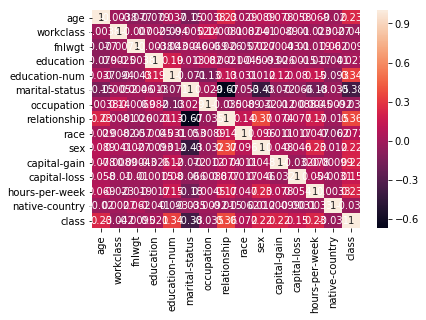

In [28]:
# Plot with Seaborn
sns.heatmap(corr_mat,annot=True)

<function matplotlib.pyplot.show(*args, **kw)>

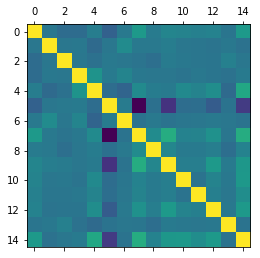

In [29]:
# Plot with Matplotlib
plt.figure(figsize=(20,10))
plt.matshow(corr_mat)
plt.show

In [30]:
# Value Counts
df['class'].value_counts()

0    24720
1     7841
Name: class, dtype: int64

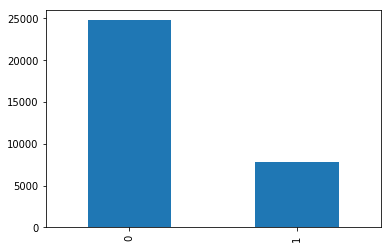

In [31]:

df['class'].value_counts().plot(kind="bar")

#### Machine Learning Aspect

In [32]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [33]:
df2.shape

(32561, 15)

In [34]:
df2.iloc[:,0:14].columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [35]:
df2.iloc[:,14].name

'class'

In [36]:
X = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

### Split Dataset into Train Test Dataset

In [37]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
print(x_train.shape)
print(y_train.shape)

(21815, 14)
(21815,)


####  Using LogisticRegression

In [40]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Accuracy of our Model
logit.score(x_test,y_test)

0.8074632421366089

### Save Models

In [42]:
from sklearn.externals import joblib

In [43]:
salary_logit_model = open("salary_logit_model.pkl","wb")
joblib.dump(logit,salary_logit_model)

In [44]:
salary_logit_model.close()

#### Using Naive Bayes

In [45]:
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
nv.score(x_test,y_test)

0.7863391029220175

In [47]:
salary_nv_model = open("salary_nv_model.pkl","wb")
joblib.dump(nv,salary_nv_model)

In [48]:
salary_nv_model.close()

#### Using RandomForest

In [49]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train,y_train)
                            

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
rf.score(x_test,y_test)

0.8467336683417085

In [51]:
# Save Model
salary_rf_model = open("salary_rf_model.pkl","wb")
joblib.dump(rf,salary_rf_model)

In [52]:
salary_rf_model.close()

### Cross Validation 

In [53]:
cv_scores = cross_val_score(LogisticRegression(),X,y,cv=10)

In [54]:
print(cv_scores)

[0.8059564  0.79883292 0.79944717 0.79760442 0.80436118 0.81050369
 0.7985258  0.80436118 0.80835381 0.8034398 ]


In [55]:
print(np.mean(cv_scores))

0.8031386377026536


#### Narative
+ Our model has an mean accuracy of 0.80

In [56]:
# Cross Validation
cv_scores2 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2),X,y,cv=10)

In [57]:
print(cv_scores2)

[0.80718453 0.80374693 0.79699017 0.80743243 0.79914005 0.80896806
 0.79944717 0.80589681 0.81296069 0.80006143]


In [58]:
# Find the Mean of the Scores
print(np.mean(cv_scores2))

0.8041828260280823


#### Narative
+ The RandomForestClassfier Model gave us 0.79

In [59]:
# Cross Validation with a change in Parameters
cv_scores3 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=4),X,y,cv=10)

In [60]:
print(cv_scores3)

[0.84095794 0.84858722 0.85411548 0.84428747 0.84920147 0.84735872
 0.84367322 0.85964373 0.85411548 0.84428747]


In [61]:
# Find the Mean of the Scores
print(np.mean(cv_scores3))

0.8486228207021883


#### Narative
+ You can observe that by changing the tree depth to 4 we have a better score than even the logisticregression model


#### Interpreting the model

In [62]:
import eli5

In [63]:
# Showing the Weight for our model
eli5.show_weights(logit, top=10)

In [64]:
df.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          4   77516         15             13               3   
1   50          7   83311         15             13               1   
2   38          5  215646          9              9               4   
3   53          5  234721         13              7               1   
4   28          5  338409         15             13               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           8             3     4    1          2174             0   
1          13             4     4    1             0             0   
2          11             3     4    1             0             0   
3          11             4     1    1             0             0   
4           0             5     1    0             0             0   

   hours-per-week  native-country  class  
0              40              15      0  
1              13              15      0  
2              40              15      0  
3              40              15      0  
4              40              20      0

In [66]:
d_class

{' <=50K': 0, ' >50K': 1}

In [67]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [68]:
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

In [69]:
class_names = ["<=50k",">50k"]

In [70]:
# Clearly Define Feature Names
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names)

In [73]:
x_test[10]

array([    43,      7, 241895,     15,     13,      3,     12,      3,
            4,      1,      0,      0,     42,     15])

In [75]:
# Reshape To A Single Sample (1,-1)
mysample = np.array(x_test[10]).reshape(1, -1)

In [76]:
logit.predict(mysample)

array([0])

#### Narative
+ Made less than 50k for salary (0)
+ <=50k Salary

In [78]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, x_test[10],feature_names=feature_names,target_names=class_names)

In [79]:
# Same as show_weights
eli5.explain_weights(logit)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='warn',\n          n_jobs=None, penalty='l2', random_state=None, solver='warn',\n          tol=0.0001, verbose=0, warm_start=False)", description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x7', weight=0.054676163435375985, std=None, value=None), FeatureWeight(feature='x4', weight=0.03866828004994866, std=None, value=None), FeatureWeight(feature='x12', weight=0.01749110176068318, std=None, value=None), FeatureWeight(feature='x0', weight=0.016853898678038645, std=None, value=None), FeatureWeight(feature='x9', weight=0.011002681832128219, std=None, value=None), FeatureWeight(feature='x11', weight=0.0006928694447676598, std=None, value=None), FeatureWeight(feature='x10', weight=0.0003185815081699122, std=None, value=None)], neg=[FeatureWeight(feature='x13', weight=-0.11449387038840925, std=None, value=None), FeatureWeight(feature='x5', weight=-0.1094362831204655, std=None, value=None), FeatureWeight(feature='x1', weight=-0.05532856868819968, std=None, value=None), FeatureWeight(feature='x6', weight=-0.049132278034520124, std=None, value=None), FeatureWeight(feature='x3', weight=-0.04605923510532572, std=None, value=None), FeatureWeight(feature='x8', weight=-0.023084773339406093, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=-0.01040046073840958, std=None, value=None), FeatureWeight(feature='x2', weight=-1.0506197427285949e-06, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None)

### Model Interpretation Using Lime

### Interpreting the Model
+ Create An Explainer(Tabular/Image/Text)
+ Data 
+ A class name[ name of targes/labels]
+ Model
+ Function that will provide the predictions.

In [80]:
# Load our pkgs
import lime
import lime.lime_tabular

In [82]:
feature_names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [83]:
class_names

['<=50k', '>50k']

In [85]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=feature_names, class_names=class_names, discretize_continuous=True)

In [86]:
len(feature_names)

14

#### Explainers For Lime
Create the explainer
+ LimeTabularExplainer : for tabular data/columns
+ LimeTextExplainer: for text/words
+ LimeImageExplainer: for images

In [87]:
# The Explainer Instance
exp = explainer.explain_instance(x_test[10], logit.predict_proba, num_features=14, top_labels=1)

In [88]:
exp.show_in_notebook(show_table=True, show_all=False)


#### Narative
+ Prediction Probalities : the probability for prediction either of these class.
+ The colors are very important
+ In the middle diagram it shows how much each feature contributes to the prediction of that class in weight
+ Hence capital gain,capital loss,workclass which are all orange are contributing their weight to the >50k in the prediction probabilities in the first
part
+ The last diagram shows each feature and their value as well as the particular class[color as orange] the belong to

In [61]:
#### Explain Model
cdit ={"AF":"AFGHANISTAN",
"AL":"ALBANIA",
"DZ":"ALGERIA",
"AS":"AMERICAN SAMOA",
"AD":"ANDORRA",
"AO":"ANGOLA",
"AI":"ANGUILLA",
"AQ":"ANTARCTICA",
"AG":"ANTIGUA AND BARBUDA",
"AR":"ARGENTINA",
"AM":"ARMENIA",
"AW":"ARUBA",
"AU":"AUSTRALIA",
"AT":"AUSTRIA",
"AZ":"AZERBAIJAN",
"BS":"BAHAMAS",
"BH":"BAHRAIN",
"BD":"BANGLADESH",
"BB":"BARBADOS",
"BY":"BELARUS",
"BE":"BELGIUM",
"BZ":"BELIZE",
"BJ":"BENIN",
"BM":"BERMUDA",
"BT":"BHUTAN",
"BO":"OLIVIA",
"BA":"BOSNIA AND HERZEGOVINA",
"BW":"BOTSWANA",
"BV":"BOUVET ISLAND",
"BR":"BRAZIL",
"IO":"BRITISH INDIAN OCEAN TERRITORY",
"BN":"BRUNEI DARUSSALAM",
"BG":"BULGARIA",
"BF":"BURKINA FASO",
"BI":"BURUNDI",
"KH":"CAMBODIA",
"CM":"CAMEROON",
"CA":"CANADA",
"CV":"CAPE VERDE",
"KY":"CAYMAN ISLANDS",
"CF":"CENTRAL AFRICAN REPUBLIC",
"TD":"CHAD",
"CL":"CHILE",
"CN":"PEOPLE'S REPUBLIC OF CHINA",
"CX":"HRISTMAS ISLAND",
"CC":"COCOS (KEELING) ISLANDS",
"CO":"COLOMBIA",
"KM":"COMOROS",
"CG":"CONGO",
"CD":"CONGO, THE DEMOCRATIC REPUBLIC OF",
"CK":"COOK ISLANDS",
"CR":"COSTA RICA",
"CI":"CÔTE D'IVOIRE",
"HR":"CROATIA",
"CU":"CUBA",
"CY":"CYPRUS",
"CZ":"CZECH REPUBLIC",
"DK":"DENMARK",
"DJ":"DJIBOUTI",
"DM":"DOMINICA",
"DO":"DOMINICAN REPUBLIC",
"EC":"ECUADOR",
"EG":"EGYPT",
"EH":"WESTERN SAHARA",
"SV":"EL SALVADOR",
"GQ":"EQUATORIAL GUINEA",
"ER":"ERITREA",
"EE":"ESTONIA",
"ET":"ETHIOPIA",
"FK":"FALKLAND ISLANDS (MALVINAS)",
"FO":"AROE ISLANDS",
"FJ":"FIJI",
"FI":"FINLAND",
"FR":"FRANCE",
"GF":"FRENCH GUIANA",
"PF":"FRENCH POLYNESIA",
"TF":"FRENCH SOUTHERN TERRITORIES",
"GA":"GABON",
"GM":"GAMBIA",
"GE":"GEORGIA",
"DE":"GERMANY",
"GH":"GHANA",
"GI":"GIBRALTAR",
"GR":"GREECE",
"GL":"GREENLAND",
"GD":"GRENADA",
"GP":"GUADELOUPE",
"GU":"GUAM",
"GT":"GUATEMALA",
"GN":"GUINEA",
"GW":"GUINEA-BISSAU",
"GY":"GUYANA",
"HT":"HAITI",
"HM":"HEARD ISLAND AND MCDONALD ISLANDS",
"HN":"HONDURAS",
"HK":"HONG KONG",
"HU":"HUNGARY",
"IS":"ICELAND",
"IN":"INDIA",
"ID":"INDONESIA",
"IR":"IRAN, ISLAMIC REPUBLIC OF",
"IQ":"IRAQ",
"IE":"IRELAND",
"IL":"ISRAEL",
"IT":"ITALY",
"JM":"JAMAICA",
"JP":"JAPAN",
"JO":"JORDAN",
"KZ":"KAZAKHSTAN",
"KE":"KENYA",
"KI":"KIRIBATI",
"KP":"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
"KR":"KOREA, REPUBLIC OF",
"KW":"KUWAIT",
"KG":"KYRGYZSTAN",
"LA":"LAO PEOPLE'S DEMOCRATIC REPUBLIC",
"LV":"LATVIA",
"LB":"LEBANON",
"LS":"LESOTHO",
"LR":"LIBERIA",
"LY":"LIBYAN ARAB JAMAHIRIYA",
"LI":"LIECHTENSTEIN",
"LT":"LITHUANIA",
"LU":"LUXEMBOURG",
"MO":"MACAO",
"MK":"MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",
"MG":"MADAGASCAR",
"MW":"MALAWI",
"MY":"MALAYSIA",
"MV":"MALDIVES",
"ML":"MALI",
"MT":"MALTA",
"MH":"MARSHALL ISLANDS",
"MQ":"MARTINIQUE",
"MR":"MAURITANIA",
"MU":"MAURITIUS",
"YT":"MAYOTTE",
"MX":"MEXICO",
"FM":"MICRONESIA, FEDERATED STATES OF",
"MD":"MOLDOVA, REPUBLIC OF",
"MC":"MONACO",
"MN":"MONGOLIA",
"MS":"MONTSERRAT",
"MA":"MOROCCO",
"MZ":"MOZAMBIQUE",
"MM":"MYANMAR",
"NA":"NAMIBIA",
"NR":"NAURU",
"NP":"NEPAL",
"NL":"NETHERLANDS",
"AN":"NETHERLANDS ANTILLES",
"NC":"NEW CALEDONIA",
"NZ":"NEW ZEALAND",
"NI":"NICARAGUA",
"NE":"NIGER",
"NG":"NIGERIA",
"NU":"NIUE",
"NF":"NORFOLK ISLAND",
"MP":"NORTHERN MARIANA ISLANDS",
"NO":"NORWAY",
"OM":"OMAN",
"PK":"PAKISTAN",
"PW":"PALAU",
"PS":"PALESTINIAN TERRITORY, OCCUPIED",
"PA":"PANAMA",
"PG":"PAPUA NEW GUINEA",
"PY":"PARAGUAY",
"PE":"PERU",
"PH":"PHILIPPINES",
"PN":"PITCAIRN",
"PL":"POLAND",
"PT":"PORTUGAL",
"PR":"PUERTO RICO",
"QA":"QATAR",
"RE":"RÉUNION",
"RO":"ROMANIA",
"RU":"RUSSIAN FEDERATION",
"RW":"RWANDA",
"SH":"SAINT HELENA",
"KN":"SAINT KITTS AND NEVIS",
"LC":"SAINT LUCIA",
"PM":"SAINT PIERRE AND MIQUELON",
"VC":"SAINT VINCENT AND THE GRENADINES",
"WS":"SAMOA",
"SM":"SAN MARINO",
"ST":"SAO TOME AND PRINCIPE",
"SA":"SAUDI ARABIA",
"SN":"SENEGAL",
"CS":"SERBIA AND MONTENEGRO",
"SC":"SEYCHELLES",
"SL":"SIERRA LEONE",
"SG":"SINGAPORE",
"SK":"SLOVAKIA",
"SI":"SLOVENIA",
"SB":"SOLOMON ISLANDS",
"SO":"SOMALIA",
"ZA":"SOUTH AFRICA",
"GS":"SOUTH GEORGIA AND SOUTH SANDWICH ISLANDS",
"ES":"SPAIN",
"LK":"SRI LANKA",
"SD":"SUDAN",
"SR":"SURINAME",
"SJ":"SVALBARD AND JAN MAYEN",
"SZ":"SWAZILAND",
"SE":"SWEDEN",
"CH":"SWITZERLAND",
"SY":"SYRIAN ARAB REPUBLIC",
"TW":"TAIWAN, REPUBLIC OF CHINA",
"TJ":"TAJIKISTAN",
"TZ":"TANZANIA, UNITED REPUBLIC OF",
"TH":"THAILAND",
"TL":"TIMOR-LESTE",
"TG":"TOGO",
"TK":"TOKELAU",
"TO":"TONGA",
"TT":"TRINIDAD AND TOBAGO",
"TN":"TUNISIA",
"TR":"TURKEY",
"TM":"TURKMENISTAN",
"TC":"TURKS AND CAICOS ISLANDS",
"TV":"TUVALU",
"UG":"UGANDA",
"UA":"UKRAINE",
"AE":"UNITED ARAB EMIRATES",
"GB":"UNITED KINGDOM",
"US":"UNITED STATES",
"UM":"UNITED STATES MINOR OUTLYING ISLANDS",
"UY":"URUGUAY",
"UZ":"UZBEKISTAN",
"VE":"VENEZUELA",
"VU":"VANUATU",
"VN":"VIET NAM",
"VG":"BRITISH VIRGIN ISLANDS",
"VI":"U.S. VIRGIN ISLANDS",
"WF":"WALLIS AND FUTUNA",
"YE":"YEMEN",
"ZW":"ZIMBABWE",
}

In [64]:
alphabet =  {k.lower(): v for k, v in cdit.items()}

In [65]:
alphabet

{'af': 'AFGHANISTAN',
 'al': 'ALBANIA',
 'dz': 'ALGERIA',
 'as': 'AMERICAN SAMOA',
 'ad': 'ANDORRA',
 'ao': 'ANGOLA',
 'ai': 'ANGUILLA',
 'aq': 'ANTARCTICA',
 'ag': 'ANTIGUA AND BARBUDA',
 'ar': 'ARGENTINA',
 'am': 'ARMENIA',
 'aw': 'ARUBA',
 'au': 'AUSTRALIA',
 'at': 'AUSTRIA',
 'az': 'AZERBAIJAN',
 'bs': 'BAHAMAS',
 'bh': 'BAHRAIN',
 'bd': 'BANGLADESH',
 'bb': 'BARBADOS',
 'by': 'BELARUS',
 'be': 'BELGIUM',
 'bz': 'BELIZE',
 'bj': 'BENIN',
 'bm': 'BERMUDA',
 'bt': 'BHUTAN',
 'bo': 'OLIVIA',
 'ba': 'BOSNIA AND HERZEGOVINA',
 'bw': 'BOTSWANA',
 'bv': 'BOUVET ISLAND',
 'br': 'BRAZIL',
 'io': 'BRITISH INDIAN OCEAN TERRITORY',
 'bn': 'BRUNEI DARUSSALAM',
 'bg': 'BULGARIA',
 'bf': 'BURKINA FASO',
 'bi': 'BURUNDI',
 'kh': 'CAMBODIA',
 'cm': 'CAMEROON',
 'ca': 'CANADA',
 'cv': 'CAPE VERDE',
 'ky': 'CAYMAN ISLANDS',
 'cf': 'CENTRAL AFRICAN REPUBLIC',
 'td': 'CHAD',
 'cl': 'CHILE',
 'cn': "PEOPLE'S REPUBLIC OF CHINA",
 'cx': 'HRISTMAS ISLAND',
 'cc': 'COCOS (KEELING) ISLANDS',
 'co': 'COLOMBIA

In [68]:
alphabet2 =  {k.lower(): v.title() for k, v in cdit.items()}

In [69]:
alphabet2

{'af': 'Afghanistan',
 'al': 'Albania',
 'dz': 'Algeria',
 'as': 'American Samoa',
 'ad': 'Andorra',
 'ao': 'Angola',
 'ai': 'Anguilla',
 'aq': 'Antarctica',
 'ag': 'Antigua And Barbuda',
 'ar': 'Argentina',
 'am': 'Armenia',
 'aw': 'Aruba',
 'au': 'Australia',
 'at': 'Austria',
 'az': 'Azerbaijan',
 'bs': 'Bahamas',
 'bh': 'Bahrain',
 'bd': 'Bangladesh',
 'bb': 'Barbados',
 'by': 'Belarus',
 'be': 'Belgium',
 'bz': 'Belize',
 'bj': 'Benin',
 'bm': 'Bermuda',
 'bt': 'Bhutan',
 'bo': 'Olivia',
 'ba': 'Bosnia And Herzegovina',
 'bw': 'Botswana',
 'bv': 'Bouvet Island',
 'br': 'Brazil',
 'io': 'British Indian Ocean Territory',
 'bn': 'Brunei Darussalam',
 'bg': 'Bulgaria',
 'bf': 'Burkina Faso',
 'bi': 'Burundi',
 'kh': 'Cambodia',
 'cm': 'Cameroon',
 'ca': 'Canada',
 'cv': 'Cape Verde',
 'ky': 'Cayman Islands',
 'cf': 'Central African Republic',
 'td': 'Chad',
 'cl': 'Chile',
 'cn': "People'S Republic Of China",
 'cx': 'Hristmas Island',
 'cc': 'Cocos (Keeling) Islands',
 'co': 'Colombia

In [70]:
from PIL import Image

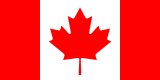

In [71]:
if 'ca' in alphabet2.keys():
    img = Image.open("cflags/ca.png")
    display(img)

In [76]:
alphabet2.get('ca')

'Canada'

### Using TPOT To find the best algorithm
+ pip install tpot

### TPOT
+ optimize a series of features in order to maximize cross validation
+ Uses Genetic Programming Concept
    - Natural Selection and Survival of the fittest

#### Approach
+ Selection
+ Crossover
+ Mutation

#### NB
+ Remove Missing Values
+ Must be categorical and numbers

### Installation
```bash
pip install tpot
```






In [54]:
# Load TPOT
import tpot

In [55]:
# Preview It Contents/Features
dir(tpot)

['TPOTClassifier',
 'TPOTRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'builtins',
 'config',
 'decorators',
 'driver',
 'export_utils',
 'gp_deap',
 'gp_types',
 'main',
 'metrics',
 'operator_utils',
 'tpot']

In [56]:
# Load TPOT Pkg
from tpot import TPOTClassifier

In [ ]:
optim = TPOTClassifier(generations=5,verbosity=2)
optim.fit(x_train,y_train)

In [ ]:
print(optim.score(x_test,y_test))

In [ ]:
# Save or Export the Best Code for our task
optim.export("exported_pipeline_for_ml.py")